In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 20, 15

In [2]:
cache_data = pd.read_csv("cache_data.csv")
cache_data.head()

,Time,Cache_id
0,2020-05-22 05:55:46.378307,2
1,2020-05-22 05:58:46.378307,16
2,2020-05-22 06:01:46.378307,2
3,2020-05-22 06:04:46.378307,20
4,2020-05-22 06:07:46.378307,2


In [3]:
def parser(x):
    t = datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    return time.mktime(t.timetuple()) - 1590123345

In [4]:
cache_data['cache_time'] = pd.Series([parser(x) for x in cache_data['Time']])

In [5]:
cache_data.head()

,Time,Cache_id,cache_time
0,2020-05-22 05:55:46.378307,2,1.0
1,2020-05-22 05:58:46.378307,16,181.0
2,2020-05-22 06:01:46.378307,2,361.0
3,2020-05-22 06:04:46.378307,20,541.0
4,2020-05-22 06:07:46.378307,2,721.0


In [3]:
cache_data['no'] = list(range(len(cache_data)))

In [7]:
cache_next = []
for i in range(len(cache_data)):
    try:
        ind = list(cache_data['Cache_id'])[i+1:].index(cache_data['Cache_id'][i])
        cache_next.append(list(cache_data['no'])[i+1:][ind])
    except Exception as e:
        print('error: ',e)
        cache_next.append(None)

error:  9 is not in list
error:  20 is not in list
error:  10 is not in list
error:  19 is not in list
error:  13 is not in list
error:  4 is not in list
error:  14 is not in list
error:  6 is not in list
error:  17 is not in list
error:  11 is not in list
error:  15 is not in list
error:  16 is not in list
error:  5 is not in list
error:  12 is not in list
error:  3 is not in list
error:  18 is not in list
error:  8 is not in list
error:  2 is not in list
error:  7 is not in list
error:  1 is not in list


In [8]:
cache_data['cache_next'] = cache_next

In [9]:
cache_data.head()

,Time,Cache_id,cache_time,no,cache_next
0,2020-05-22 05:55:46.378307,2,1.0,0,2.0
1,2020-05-22 05:58:46.378307,16,181.0,1,32.0
2,2020-05-22 06:01:46.378307,2,361.0,2,4.0
3,2020-05-22 06:04:46.378307,20,541.0,3,138.0
4,2020-05-22 06:07:46.378307,2,721.0,4,5.0


In [10]:
cache_next.index(None)

1902

In [11]:
cache_data_new = cache_data[:1902]

In [12]:
cache_data_new.head()

,Time,Cache_id,cache_time,no,cache_next
0,2020-05-22 05:55:46.378307,2,1.0,0,2.0
1,2020-05-22 05:58:46.378307,16,181.0,1,32.0
2,2020-05-22 06:01:46.378307,2,361.0,2,4.0
3,2020-05-22 06:04:46.378307,20,541.0,3,138.0
4,2020-05-22 06:07:46.378307,2,721.0,4,5.0


In [4]:
cache_data_new['cache_occurance'] = [list(cache_data_new['Cache_id'][:i+1]).count(cache_data_new['Cache_id'][i]) for i in list(range(len(cache_data_new)))]

NameError: name 'cache_data_new' is not defined

In [14]:
cache_data_new.head()

,Time,Cache_id,cache_time,no,cache_next,cache_occurance
0,2020-05-22 05:55:46.378307,2,1.0,0,2.0,1
1,2020-05-22 05:58:46.378307,16,181.0,1,32.0,1
2,2020-05-22 06:01:46.378307,2,361.0,2,4.0,2
3,2020-05-22 06:04:46.378307,20,541.0,3,138.0,1
4,2020-05-22 06:07:46.378307,2,721.0,4,5.0,3


In [15]:
indexedDataset = cache_data_new.set_index(['Time']) 

In [16]:
indexedDataset.head()

,Cache_id,cache_time,no,cache_next,cache_occurance
Time,,,,,
2020-05-22 05:55:46.378307,2,1.0,0,2.0,1
2020-05-22 05:58:46.378307,16,181.0,1,32.0,1
2020-05-22 06:01:46.378307,2,361.0,2,4.0,2
2020-05-22 06:04:46.378307,20,541.0,3,138.0,1
2020-05-22 06:07:46.378307,2,721.0,4,5.0,3


In [17]:
# Joining two dataframes
#pd.concat([df_name, df_name], axis=1)

In [18]:
s = set(indexedDataset['Cache_id'])
# Dataset_sep contains all dataset for each cache_id
dataset_sep = []
for i in s:
    dataset_sep.append(indexedDataset[indexedDataset['Cache_id'] == i])

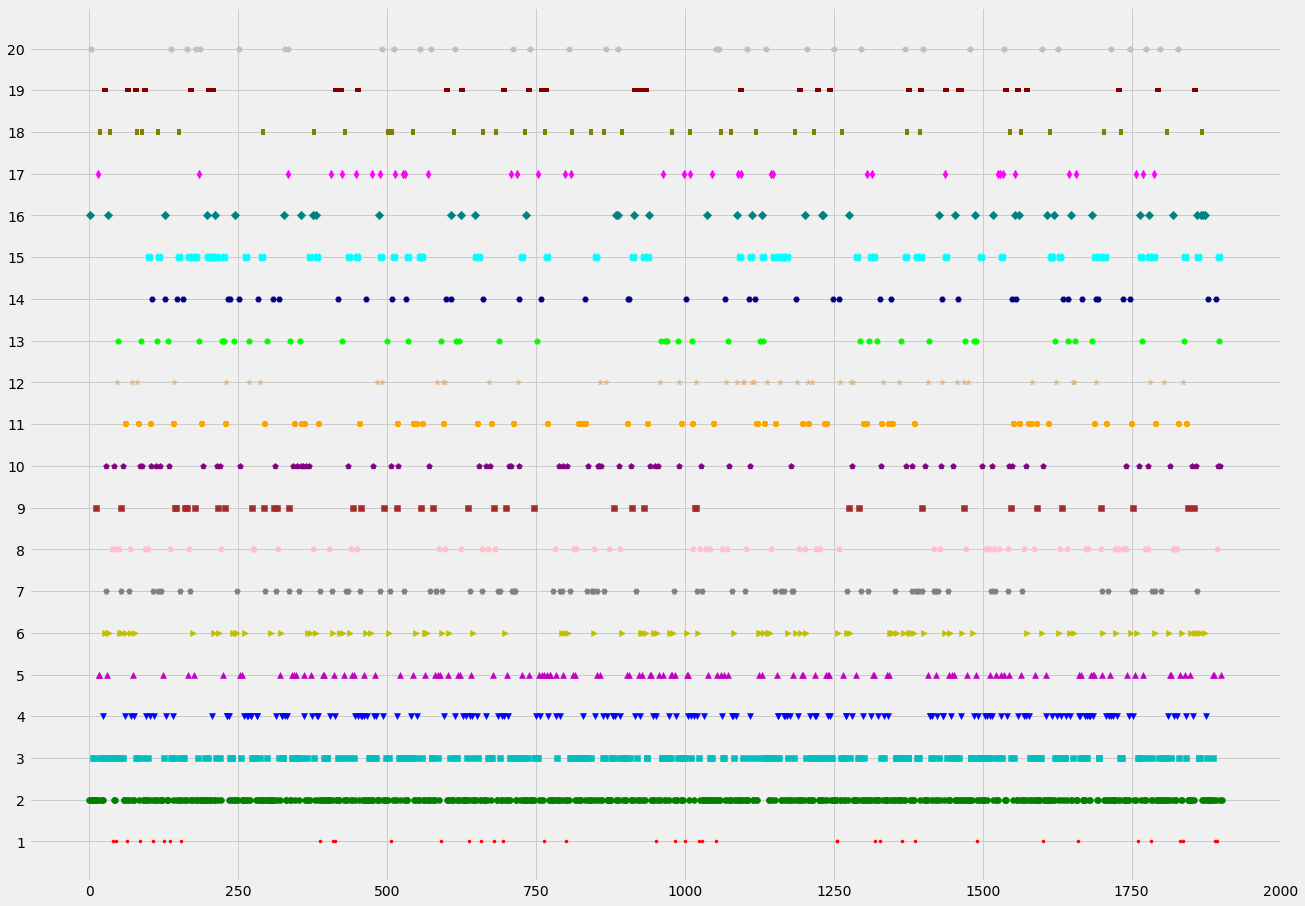

In [19]:
# Plotting data
color_code = ['r', 'g', 'c', 'b', 'm', 'y', 'grey', 'pink', 'brown', 'purple', 'orange', 'burlywood', 'lime', 'navy', 'aqua', 'teal', 'fuchsia', 'olive', 'maroon', 'silver']
marker= ['.', 'o', ',', 'v', '^', '>', '1', '2', 's', 'p', '+', '*', 'h', 'H', 'x', 'D', 'd', '|', '_', '3']
j = 0
for i in dataset_sep:
    plt.scatter(list(i['no'])[:], list(i['Cache_id'])[:], c=color_code[j], marker=marker[j])
    j += 1
plt.yticks(range(1,21))
plt.show()

In [20]:
# save to csv
# df.to_csv('filename')

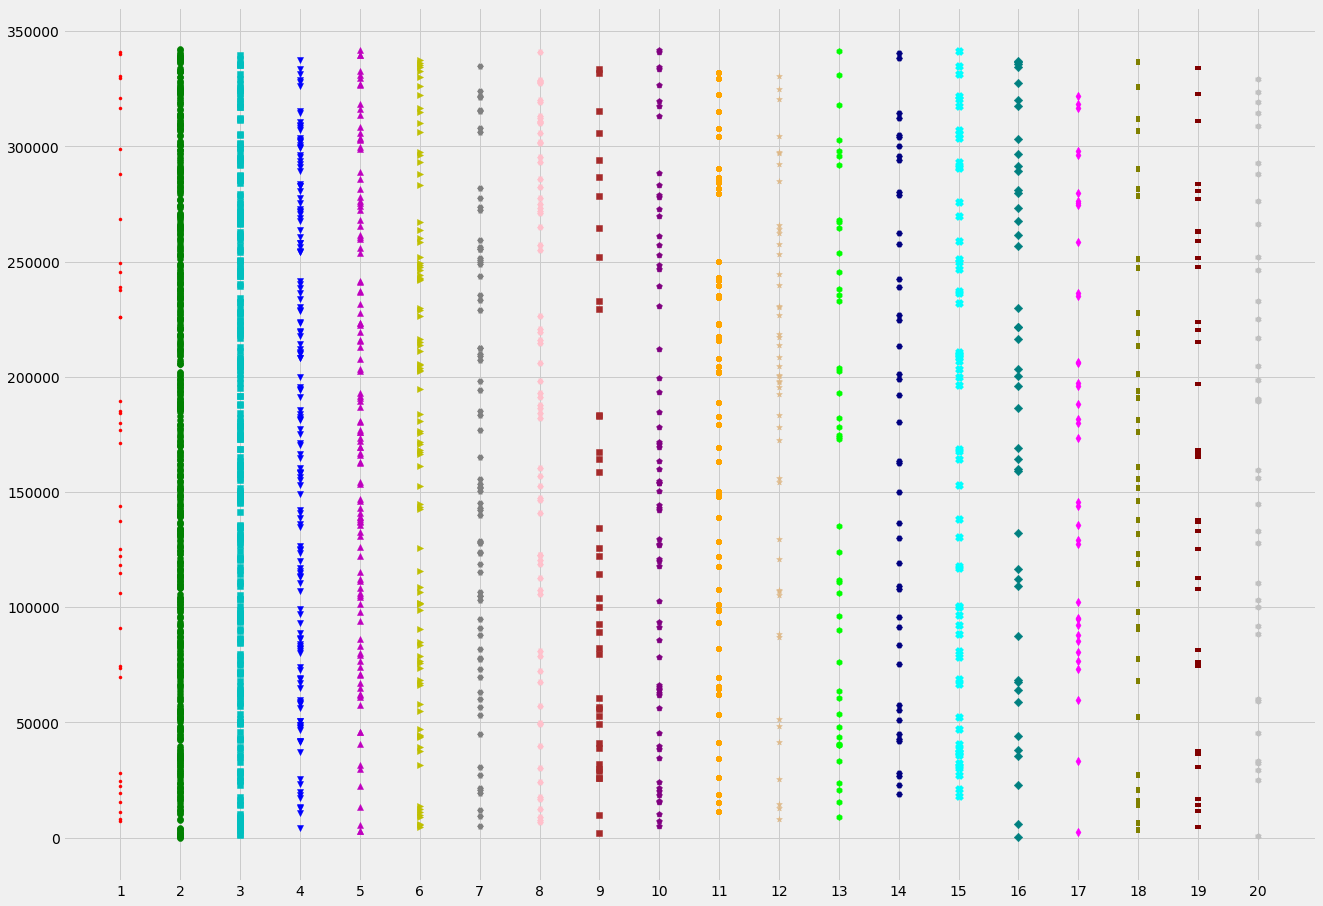

In [21]:
# Plotting Dataframes
#dataset_sep[1].plot(dataset_sep[1]['cache_time'], dataset_sep[1]['Cache_id'], kind='scatter', legend=True)
#my_plot.set_xlabel('City')
#my_plot.set_ylabel('Score Value')
color_code = ['r', 'g', 'c', 'b', 'm', 'y', 'grey', 'pink', 'brown', 'purple', 'orange', 'burlywood', 'lime', 'navy', 'aqua', 'teal', 'fuchsia', 'olive', 'maroon', 'silver']
marker= ['.', 'o', ',', 'v', '^', '>', '1', '2', 's', 'p', '+', '*', 'h', 'H', 'x', 'D', 'd', '|', '_', '3']
j = 0
for i in dataset_sep:
    plt.scatter(list(i['Cache_id'])[:], list(i['cache_time'])[:], c=color_code[j], marker=marker[j])
    j += 1
plt.xticks(range(1,21))
plt.show()

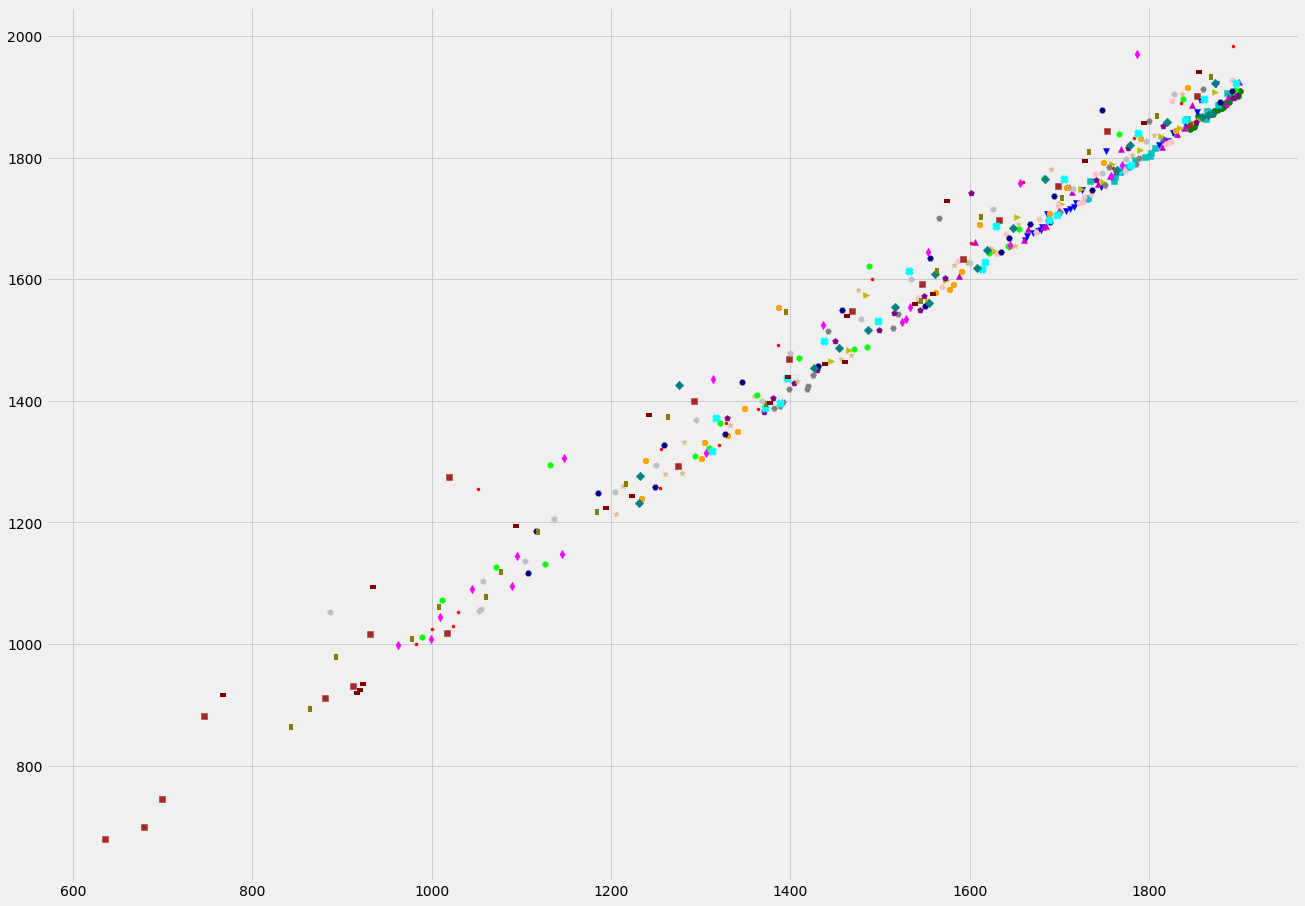

In [24]:
j = 0
for i in dataset_sep:
    plt.scatter(list(i['no'])[-20:], list(i['cache_next'])[-20:], c=color_code[j], marker=marker[j])
    j += 1
plt.show()

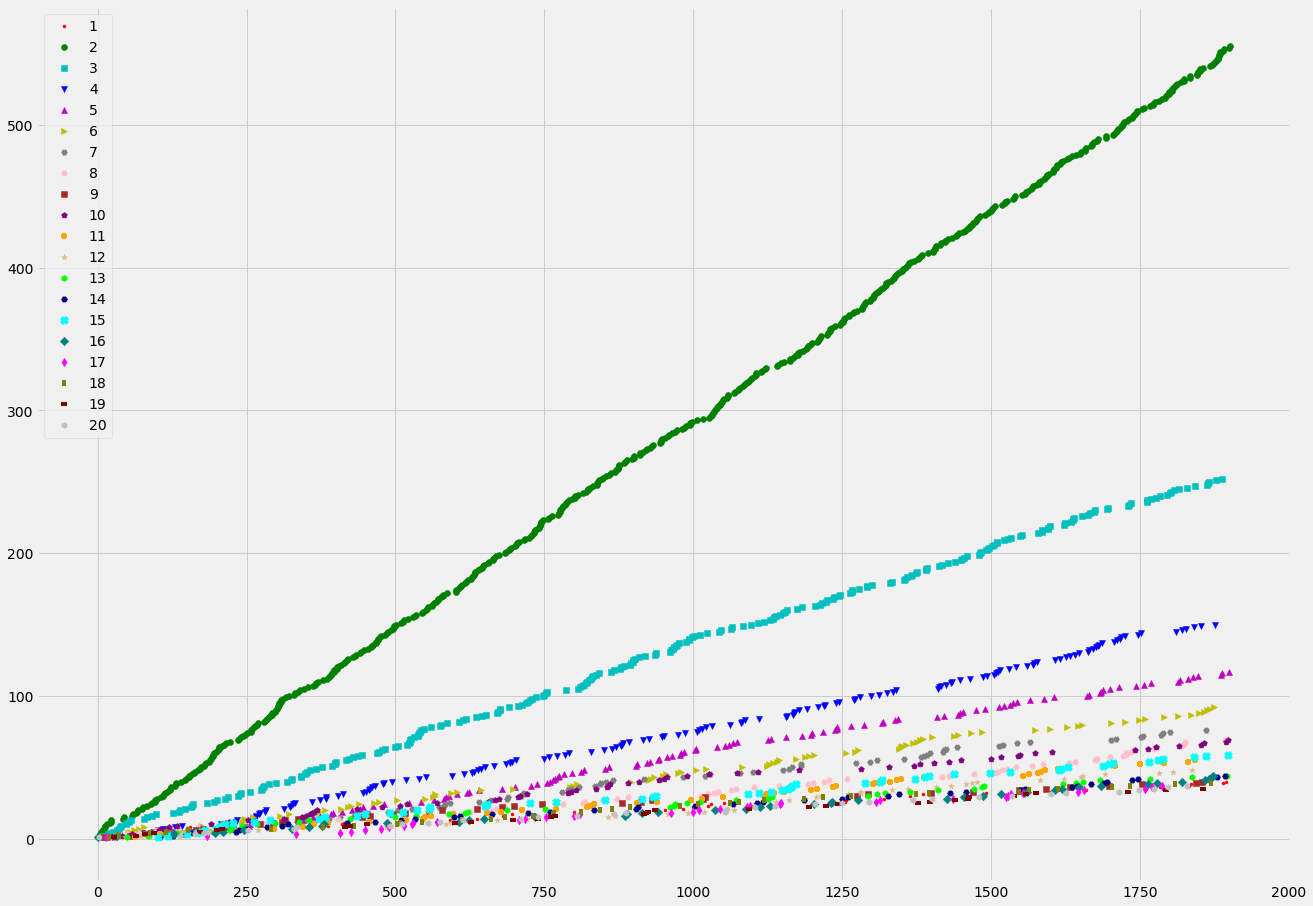

In [29]:
j = 0
for i in dataset_sep:
    plt.scatter(list(i['no'])[:], list(i['cache_occurance'])[:], c=color_code[j], marker=marker[j], label=f"{i['Cache_id'][0]}")
    j += 1
plt.legend()
plt.show()

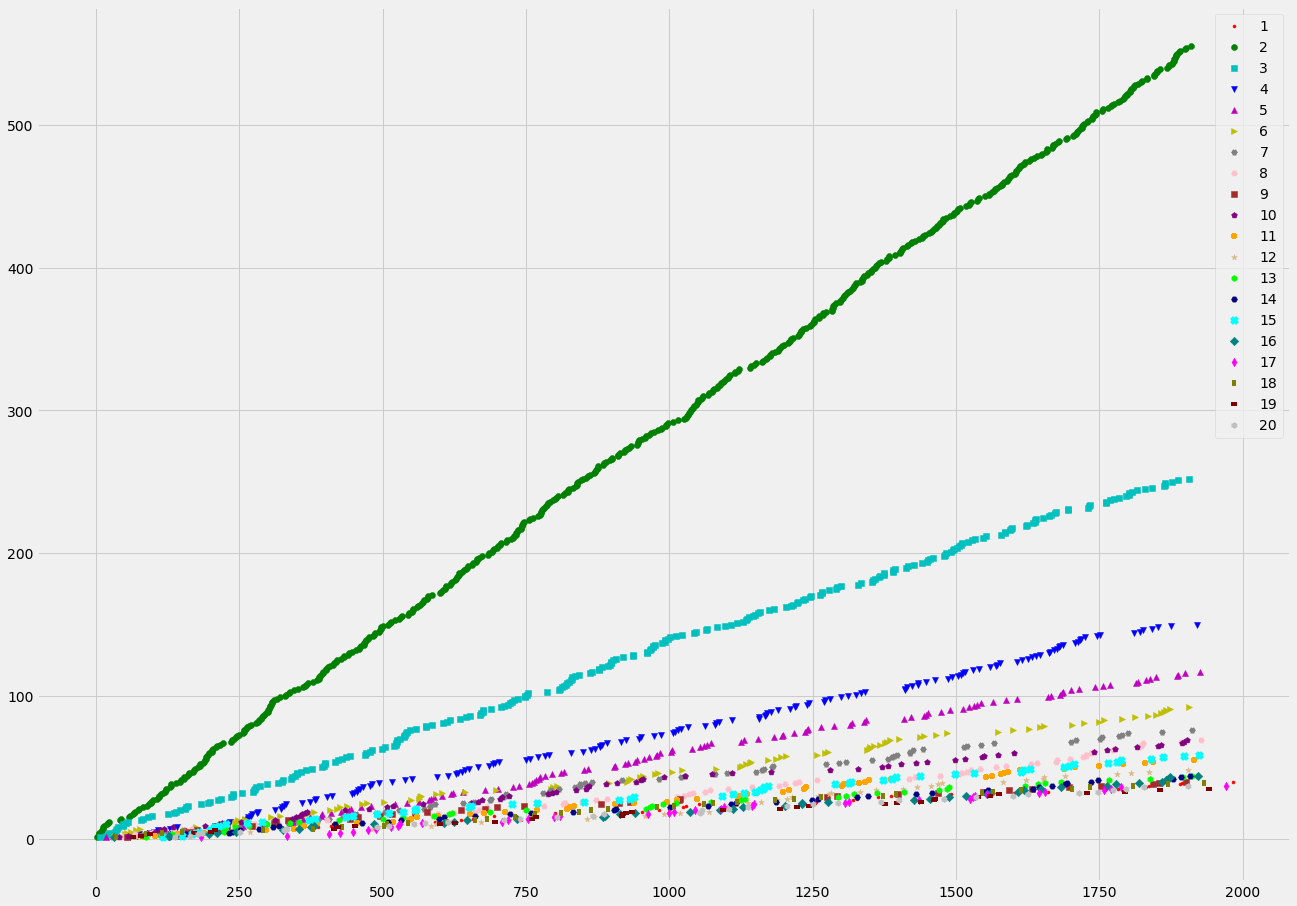

In [30]:
j = 0
for i in dataset_sep:
    plt.scatter(list(i['cache_next'])[:], list(i['cache_occurance'])[:], c=color_code[j], marker=marker[j], label=f"{i['Cache_id'][0]}")
    j += 1
plt.legend()
plt.show()

In [31]:
indexedDataset.head()

,Cache_id,cache_time,no,cache_next,cache_occurance
Time,,,,,
2020-05-22 05:55:46.378307,2,1.0,0,2.0,1
2020-05-22 05:58:46.378307,16,181.0,1,32.0,1
2020-05-22 06:01:46.378307,2,361.0,2,4.0,2
2020-05-22 06:04:46.378307,20,541.0,3,138.0,1
2020-05-22 06:07:46.378307,2,721.0,4,5.0,3


In [32]:
indexedDataset.to_csv('processed_data.csv')

In [ ]:
# association dataset
# Apriori Algorithm (Associated Learning) 

In [5]:
cache_data['cache_occurance'] = [list(cache_data['Cache_id'][:i+1]).count(cache_data['Cache_id'][i]) for i in list(range(len(cache_data)))]

In [14]:
cache_data[:35]

,Time,Cache_id,no,cache_occurance
0,2020-05-22 05:55:46.378307,2,0,1
1,2020-05-22 05:58:46.378307,16,1,1
2,2020-05-22 06:01:46.378307,2,2,2
3,2020-05-22 06:04:46.378307,20,3,1
4,2020-05-22 06:07:46.378307,2,4,3
5,2020-05-22 06:10:46.378307,2,5,4
6,2020-05-22 06:13:46.378307,2,6,5
7,2020-05-22 06:16:46.378307,3,7,1
8,2020-05-22 06:19:46.378307,3,8,2
9,2020-05-22 06:22:46.378307,2,9,6


In [17]:
next_step = []
for i in range(len(cache_data)):
    try:
        ind = list(cache_data['Cache_id'])[i+1:].index(cache_data['Cache_id'][i])
        #print(ind, i)
        n = list(cache_data['no'])[i+1:][ind] - i
        next_step.append(n)
    except Exception as e:
        print('error: ',e)
        next_step.append(None)

error:  9 is not in list
error:  20 is not in list
error:  10 is not in list
error:  19 is not in list
error:  13 is not in list
error:  4 is not in list
error:  14 is not in list
error:  6 is not in list
error:  17 is not in list
error:  11 is not in list
error:  15 is not in list
error:  16 is not in list
error:  5 is not in list
error:  12 is not in list
error:  3 is not in list
error:  18 is not in list
error:  8 is not in list
error:  2 is not in list
error:  7 is not in list
error:  1 is not in list


In [18]:
next_step

[2,
 31,
 2,
 135,
 1,
 1,
 3,
 1,
 10,
 1,
 2,
 43,
 1,
 2,
 170,
 5,
 1,
 13,
 3,
 16,
 2,
 4,
 1,
 19,
 36,
 8,
 5,
 38,
 13,
 24,
 43,
 3,
 96,
 3,
 17,
 45,
 1,
 2,
 5,
 8,
 5,
 16,
 2,
 7,
 14,
 18,
 26,
 1,
 4,
 38,
 19,
 4,
 4,
 14,
 90,
 6,
 22,
 28,
 1,
 5,
 11,
 9,
 22,
 23,
 2,
 14,
 2,
 41,
 6,
 24,
 7,
 4,
 9,
 51,
 2,
 20,
 7,
 98,
 4,
 15,
 8,
 61,
 9,
 7,
 20,
 4,
 21,
 27,
 27,
 14,
 2,
 7,
 4,
 6,
 77,
 7,
 1,
 3,
 28,
 36,
 6,
 17,
 7,
 9,
 39,
 22,
 4,
 18,
 8,
 20,
 1,
 2,
 7,
 4,
 19,
 36,
 4,
 4,
 32,
 15,
 32,
 1,
 1,
 7,
 42,
 11,
 11,
 21,
 69,
 12,
 1,
 1,
 8,
 52,
 57,
 33,
 19,
 2,
 26,
 8,
 6,
 66,
 88,
 46,
 1,
 16,
 3,
 9,
 9,
 4,
 17,
 140,
 18,
 1,
 5,
 232,
 2,
 76,
 2,
 3,
 23,
 4,
 1,
 6,
 15,
 12,
 10,
 7,
 53,
 3,
 79,
 30,
 1,
 5,
 6,
 35,
 49,
 40,
 3,
 7,
 19,
 1,
 5,
 12,
 149,
 38,
 66,
 1,
 2,
 40,
 2,
 24,
 1,
 1,
 2,
 5,
 2,
 14,
 4,
 6,
 13,
 7,
 1,
 1,
 5,
 1,
 8,
 24,
 207,
 3,
 8,
 34,
 4,
 6,
 13,
 5,
 6,
 11,
 24,
 17,
 33,
 54,
 13

In [19]:
cache_data['cache_next'] = next_step

In [20]:
cache_data.head()

,Time,Cache_id,no,cache_occurance,cache_next
0,2020-05-22 05:55:46.378307,2,0,1,2.0
1,2020-05-22 05:58:46.378307,16,1,1,31.0
2,2020-05-22 06:01:46.378307,2,2,2,2.0
3,2020-05-22 06:04:46.378307,20,3,1,135.0
4,2020-05-22 06:07:46.378307,2,4,3,1.0


In [23]:
cache_data[cache_data['Cache_id']==20]

,Time,Cache_id,no,cache_occurance,cache_next
3,2020-05-22 06:04:46.378307,20,3,1,135.0
138,2020-05-22 12:49:46.378307,20,138,2,26.0
164,2020-05-22 14:07:46.378307,20,164,3,15.0
179,2020-05-22 14:52:46.378307,20,179,4,7.0
186,2020-05-22 15:13:46.378307,20,186,5,66.0
252,2020-05-22 18:31:46.378307,20,252,6,77.0
329,2020-05-22 22:22:46.378307,20,329,7,5.0
334,2020-05-22 22:37:46.378307,20,334,8,157.0
491,2020-05-23 06:28:46.378307,20,491,9,20.0
511,2020-05-23 07:28:46.378307,20,511,10,44.0


In [25]:
p = list(cache_data[cache_data['Cache_id']==20]['cache_next'])

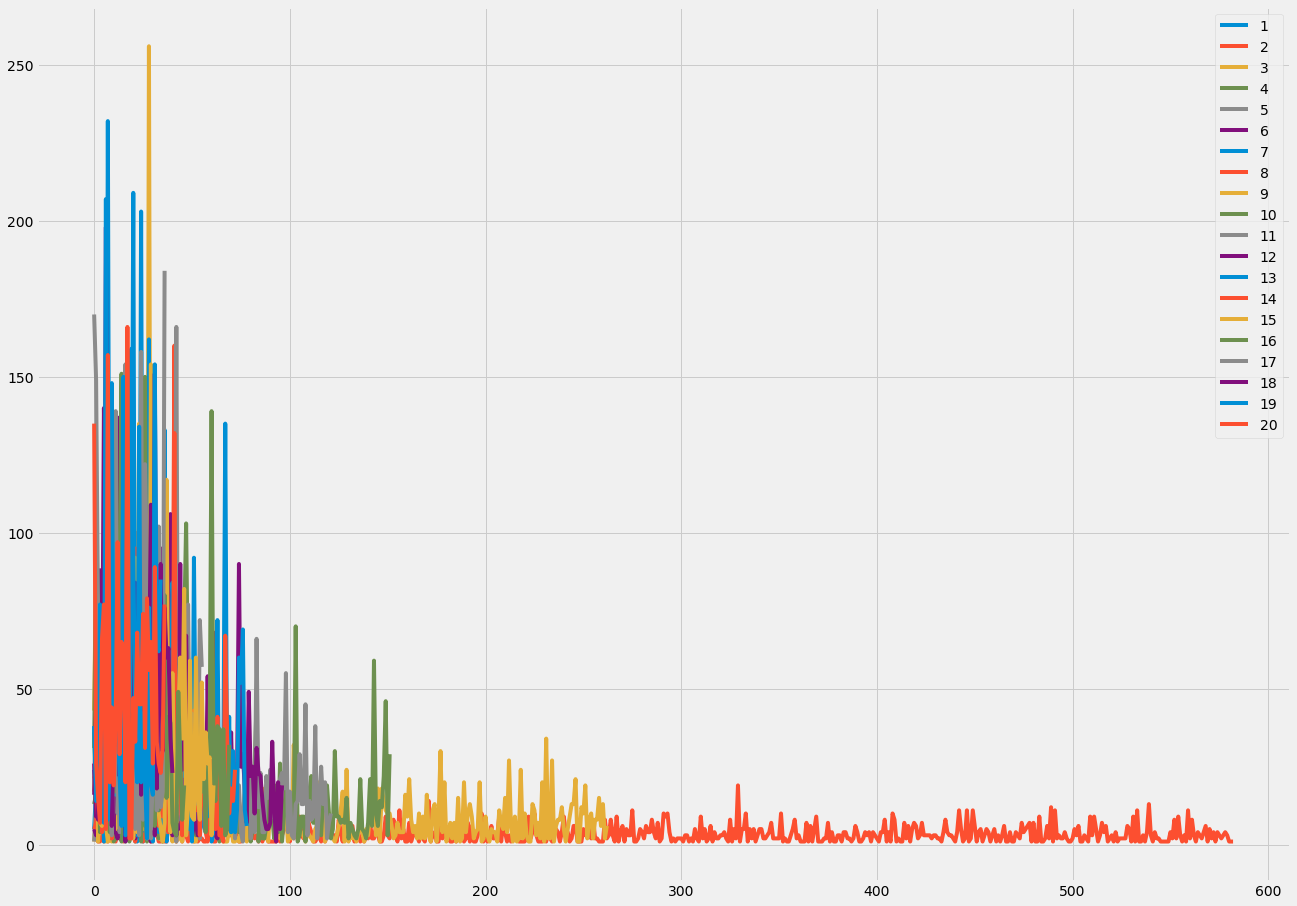

In [27]:
for i in range(1,21):
    plt.plot(list(cache_data[cache_data['Cache_id']==i]['cache_next']), label=i)

plt.legend()
    

In [28]:
cache_data.to_csv('prepared_new.csv')